(sec:TJ_stats)=

# Support Vector Machine for Triple Junction dataset

&nbsp;&nbsp;&nbsp; SVM being the best model of the previous strategy, we started to apply it to the TJ dataset. Coming from a dataset with many observations, considering only TJ reduce drastically the number of observations of the samples (see [Table 2.3](tab:TJ_sample)). This low number of observations amplify the difference of distribution between the 5 samples which leads to an increase of the variance of the cross validation results. We can see on [Figure 4.1](fig:TJ-SVM_ls) this increase of the variance on recall and specificity. The points of tests on ROC curve are also really spaced and close to the $x=y$ straight, that signify that the model is not really better than a random classifier. The [Figure 4.2](fig:TJ-SVM_CMp) shows the confusion matrix and the projection for the test on CI04. 

&nbsp;&nbsp;&nbsp; In view to involve a little results, we tried to modify classification class weights. The [Figure 4.3](fig:TJ-SVM_W) represents the results of the sevral cross validations done with different weight for the RX class. We can observe that better the huge variance of the results and that means never get out the $x=y$ straight. 

&nbsp;&nbsp;&nbsp; A little bit out of time, we choose to move on ANN models and not going further, this TJ tabular dataset that seems too poor in information to allow us to distinguish any trend. 

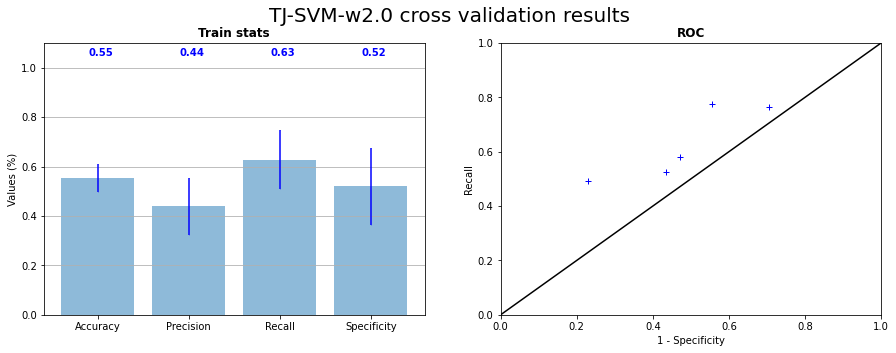

In [3]:
# NO CODE

import numpy as np
import sys
sys.path.append("../../scripts/")
import utils

import matplotlib.pyplot as plt

file_res = "../../../RUN_GRICAD/res/CV_TJ-SVM-w2.0_res.txt"
file_cm = "../../../RUN_GRICAD/res/CV_TJ-SVM-w2.0_confmats.txt"

utils.plot_res_CV(file_res, Rcurve=False)

:::{figure-md} fig:TJ-SVM_ls
<img src="../../img/vide.png" >

SVM RBF kernel cross validation on the 5 samples of TJ dataset statistics and corresponding ROC curve
:::

:::{figure-md} fig:TJ-SVM_CMp
<img src="../../img/TJ-SVM_CMp.png" >

Confusion matrix of prediction of SVM on CI04 TJ dataset with learning on the 4 others samples and projection of the prediction.
:::

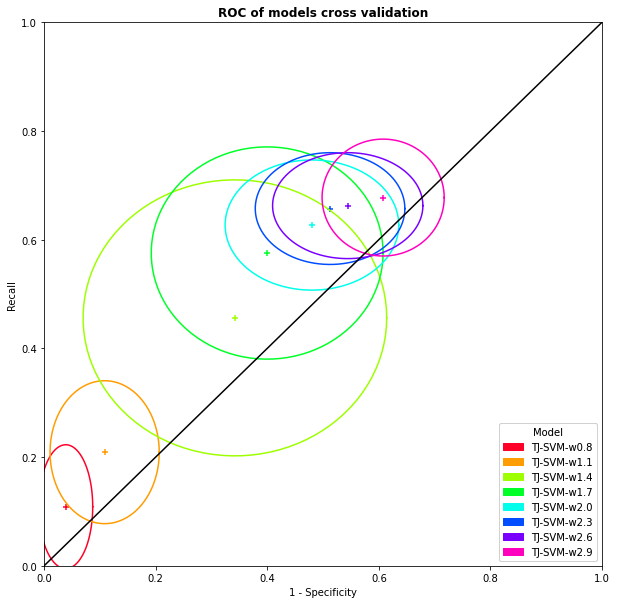

In [13]:
# NO CODE

file1 = "../../../RUN_GRICAD/res/CV_TJ-SVM-w0.8_res.txt"
file2 = "../../../RUN_GRICAD/res/CV_TJ-SVM-w1.1_res.txt"
file3 = "../../../RUN_GRICAD/res/CV_TJ-SVM-w1.4_res.txt"
file4 = "../../../RUN_GRICAD/res/CV_TJ-SVM-w1.7_res.txt"
file5 = "../../../RUN_GRICAD/res/CV_TJ-SVM-w2.0_res.txt"
file6 = "../../../RUN_GRICAD/res/CV_TJ-SVM-w2.3_res.txt"
file7 = "../../../RUN_GRICAD/res/CV_TJ-SVM-w2.6_res.txt"
file8 = "../../../RUN_GRICAD/res/CV_TJ-SVM-w2.9_res.txt"

files = [file1,file2,file3,file4,file5,file6,file7,file8]
utils.ROC_patch(files)
plt.show()

:::{figure-md} fig:TJ-SVM_W
<img src="../../img/vide.png" >

SVM on TJ dataset cross validation mean and standard deviation with variation of RX class weight
:::

In [ ]:
# HIDDEN

cms = np.loadtxt(file_cm)
mat = np.array([[cms[1][0],cms[1][1]],[cms[1][2],cms[1][3]]])

import seaborn as sns

ax = sns.heatmap(mat, annot=True, cmap='seismic')

ax.set_title('Confusion Matrix of prediction on CI04\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('True Values ');

plt.show()

In [ ]:
# HIDDEN

n_mat = np.array([[mat[0][0]/(mat[0][0]+mat[0][1]),mat[0][1]/(mat[0][0]+mat[0][1])],[mat[1][0]/(mat[1][0]+mat[1][1]),mat[1][1]/(mat[1][0]+mat[1][1])]])

cms = np.loadtxt(file_cm)

ax = sns.heatmap(n_mat, annot=True, cmap='seismic')

ax.set_title('Normalized Confusion Matrix of prediction on CI04\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('True Values ');

plt.show()